# This Script Explores the Dataset with Descriptive Statistics

We are going to look at the Chicago Bike Sharing Data from this [kaggle dataset](https://www.kaggle.com/yingwurenjian/chicago-divvy-bicycle-sharing-data)

## Import the Neccessary Libraries

In [2]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

## Import the Dataset

In [3]:
os.chdir("..")
data_set = pd.read_csv("Datasets/data_randreduced.csv")
os.chdir('code')

What does the dataset look like?

In [5]:
data_set.head()

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
0,2198011,2014,6,25,4,23,Subscriber,Male,2014-06-20 23:14:00,2014-06-20 23:31:00,...,143,Sedgwick St & Webster Ave,41.921970,-87.638540,15.0,69,Damen Ave & Pierce Ave,41.909396,-87.677692,19.0
1,2297417,2014,6,26,4,15,Subscriber,Male,2014-06-27 15:54:00,2014-06-27 16:12:00,...,85,Michigan Ave & Oak St,41.900960,-87.623777,23.0,91,Clinton St & Washington Blvd,41.883380,-87.641170,31.0
2,2200982,2014,6,25,5,10,Subscriber,Male,2014-06-21 10:37:00,2014-06-21 10:42:00,...,48,Larrabee St & Kingsbury St,41.897764,-87.642884,27.0,31,Franklin St & Chicago Ave,41.896802,-87.635638,23.0
3,2343629,2014,6,27,0,7,Subscriber,Male,2014-06-30 07:17:00,2014-06-30 07:26:00,...,31,Franklin St & Chicago Ave,41.896802,-87.635638,23.0,81,Daley Center Plaza,41.884163,-87.629635,39.0
4,2237280,2014,6,26,0,17,Subscriber,Male,2014-06-23 17:07:00,2014-06-23 17:09:00,...,198,Halsted St & Madison St,41.881750,-87.647800,19.0,77,Clinton St & Madison St,41.881582,-87.641277,23.0


What are the columns?

In [6]:
data_set.columns

Index(['trip_id', 'year', 'month', 'week', 'day', 'hour', 'usertype', 'gender',
       'starttime', 'stoptime', 'tripduration', 'temperature', 'events',
       'from_station_id', 'from_station_name', 'latitude_start',
       'longitude_start', 'dpcapacity_start', 'to_station_id',
       'to_station_name', 'latitude_end', 'longitude_end', 'dpcapacity_end'],
      dtype='object')

## Lets look at the popularity of certain bike routes

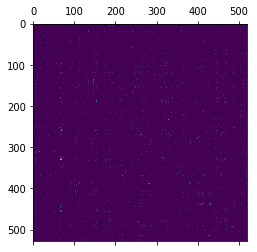

In [8]:
from_station="from_station_name"
to_station="to_station_name"
f1, ax1 = plt.subplots(1)
cross_table = pd.crosstab(data_set[from_station], data_set[to_station], normalize=False)
ax1.matshow(cross_table)
plt.show()

As you can see, there are certain bright spots in the heatmap visual, which indicates that some paths are more popular than others

## Hypothesis Testing

So what are the forces and mechanisms driving the sharing of bicycles in Chicago? Are there any inefficiencies or roadblocks for bike sharing? Can we predict who and where people will go on their bike trips?

1. Bad weather can reduce the number of people taking bike trips
2. The weather can actually affect the time it take to get from one trip to another
3. Highest biked paths have the most bike capacity. 
   * If not, there are inefficiencies and the city should invest more resources into that area
4. More people will want to share bikes at later start times
   * People do not want to wake up early
5. More people will want to share bikes at an earlier stoptime
   * People do not want to bike in the dark
5. Most are one time riders and do not purchase bike sharing subscriptions
6. Most riders bike during the summer, when the weather is warm
7. The number of bike sharing riders has increased over the years

In [12]:
#lets see if any of the features are correlated
#first, lets map the strings to integer
data_set_format = pd.get_dummies(data_set, prefix='gender', columns=['gender'])
data_set_format = pd.get_dummies(data_set, prefix='gender', columns=['gender'])
data_set_format = pd.get_dummies(data_set, prefix='usertype', columns=['usertype'])
data_set_format = pd.get_dummies(data_set, prefix='events', columns=['events'])

In [11]:
list(map(data_set['tripduration'].quantile, [0.25, 0.50, 0.75, 0.90]))

[5.966666666666668, 9.616666666666667, 15.216666666666667, 21.4]

In [16]:
data_set['events'].value_counts()

cloudy          8360
clear            521
rain or snow     430
not clear        102
tstorms           82
Name: events, dtype: int64